# Data Cleaning
This notebook is for gathering and combining our data. The output should be a combination of all our data in a csv format.

The code involves importing the weather data and the solar generation data, joining the two datasets, then outputting the dataset for future usage.

The code was run on Google Colaboratory, which is why there are odd import syntax.

In [0]:
# Link that has all the property description. https://nsrdb.nrel.gov/about/u-s-data.html
# Cloud type: https://www.ncdc.noaa.gov/cdr/atmospheric/avhrr-cloud-properties-patmos-x
# Real-Time Data: https://midcdmz.nrel.gov/

In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

ModuleNotFoundError: No module named 'google'

In [0]:
# Mounting the Google Drive locally. Allows me to access my own drives.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# Weather dataset
dataset = glob.glob('/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/*.csv')

NameError: name 'glob' is not defined

In [0]:
dataset

['/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2007.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2008.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2009.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2010.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2011.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2012.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2013.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2014.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2015.csv',
 '/content/drive/Shared drives/EnergyForecaster/Dataset/NREL_Data/734232_29.77_-95.38_2016.csv',
 '/content/drive/Shared drives

In [0]:
df = pd.DataFrame()

# We only want data from 2013 onwards since the solar data before 2013
# is poorly documented
for csv in dataset[6:]:
  temp_df = pd.read_csv(csv,skiprows=2)
  df = df.append(temp_df, ignore_index=True)

In [0]:
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2013,1,1,0,0,0,0,0,0,0,0,4,17.0,171.19,0,0.143,1.2,4.701,215.9,100.00,17.0,1010.0
1,2013,1,1,0,30,0,0,0,0,0,0,4,17.0,173.12,0,0.143,1.0,4.717,215.9,100.00,17.0,1010.0
2,2013,1,1,1,0,0,0,0,0,0,0,4,17.0,169.65,0,0.143,0.8,4.734,264.1,100.00,17.0,1010.0
3,2013,1,1,1,30,0,0,0,0,0,0,4,17.0,163.97,0,0.143,1.2,4.707,264.1,100.00,17.0,1010.0
4,2013,1,1,2,0,0,0,0,0,0,0,4,17.0,157.73,0,0.143,1.6,4.681,324.3,100.00,17.0,1010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2018,12,31,21,30,0,0,0,0,0,0,8,0.1,140.49,0,0.140,3.7,1.100,181.0,78.08,3.6,1030.0
105116,2018,12,31,22,0,0,0,0,0,0,0,4,-0.4,147.00,0,0.140,3.8,1.100,360.0,77.05,3.2,1031.0
105117,2018,12,31,22,30,0,0,0,0,0,0,7,-0.4,153.47,0,0.140,3.9,1.100,180.0,78.70,2.9,1031.0
105118,2018,12,31,23,0,0,0,0,0,0,0,7,-1.1,159.86,0,0.140,4.0,1.100,0.0,76.42,2.6,1031.0


In [0]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [0]:
# Importing the cleaned_dataset from the google drive
file_location = '/content/drive/Shared drives/EnergyForecaster/Dataset/Fuel_Mix_2007_2019_Data/cleaned_solar_generation_data.csv'
cleaned_dataset=pd.read_csv(file_location, sep='\t')

In [0]:
# Solar generation dataset
cleaned_dataset

,Date,hhmm,Solar
0,01/01/2013,00:30,0.0
1,01/01/2013,01:00,0.0
2,01/01/2013,01:30,0.0
3,01/01/2013,02:00,0.0
4,01/01/2013,02:30,0.0
...,...,...,...
122683,12/31/2019,22:00,0.0
122684,12/31/2019,22:30,0.0
122685,12/31/2019,23:00,0.0
122686,12/31/2019,23:30,0.0


In [0]:
# Formatting the Date to match the solar data
df['Date'] = df.apply(lambda row: str(row['Month']).zfill(2)+'/'+
                      str(row['Day']).zfill(2)+'/'+
                      str(row['Year']), axis=1)

In [0]:
# Formatting the hhmm to match the solar data
df['hhmm'] = df.apply(lambda row: str(row['Hour']).zfill(2)+':'+
                      str(row['Minute']).zfill(2), axis=1)

In [0]:
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Date,hhmm
0,2013,1,1,0,0,0,0,0,0,0,0,4,17.0,171.19,0,0.143,1.2,4.701,215.9,100.00,17.0,1010.0,01/01/2013,00:00
1,2013,1,1,0,30,0,0,0,0,0,0,4,17.0,173.12,0,0.143,1.0,4.717,215.9,100.00,17.0,1010.0,01/01/2013,00:30
2,2013,1,1,1,0,0,0,0,0,0,0,4,17.0,169.65,0,0.143,0.8,4.734,264.1,100.00,17.0,1010.0,01/01/2013,01:00
3,2013,1,1,1,30,0,0,0,0,0,0,4,17.0,163.97,0,0.143,1.2,4.707,264.1,100.00,17.0,1010.0,01/01/2013,01:30
4,2013,1,1,2,0,0,0,0,0,0,0,4,17.0,157.73,0,0.143,1.6,4.681,324.3,100.00,17.0,1010.0,01/01/2013,02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2018,12,31,21,30,0,0,0,0,0,0,8,0.1,140.49,0,0.140,3.7,1.100,181.0,78.08,3.6,1030.0,12/31/2018,21:30
105116,2018,12,31,22,0,0,0,0,0,0,0,4,-0.4,147.00,0,0.140,3.8,1.100,360.0,77.05,3.2,1031.0,12/31/2018,22:00
105117,2018,12,31,22,30,0,0,0,0,0,0,7,-0.4,153.47,0,0.140,3.9,1.100,180.0,78.70,2.9,1031.0,12/31/2018,22:30
105118,2018,12,31,23,0,0,0,0,0,0,0,7,-1.1,159.86,0,0.140,4.0,1.100,0.0,76.42,2.6,1031.0,12/31/2018,23:00


In [0]:
# Inner joining the weather and solar data on date.
joined_df = pd.merge(df, cleaned_dataset, on=['Date', 'hhmm'])

In [0]:
joined_df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Date,hhmm,Solar
0,2013,1,1,0,0,0,0,0,0,0,0,4,17.0,171.19,0,0.143,1.2,4.701,215.9,100.00,17.0,1010.0,01/01/2013,00:00,0.0
1,2013,1,1,0,30,0,0,0,0,0,0,4,17.0,173.12,0,0.143,1.0,4.717,215.9,100.00,17.0,1010.0,01/01/2013,00:30,0.0
2,2013,1,1,1,0,0,0,0,0,0,0,4,17.0,169.65,0,0.143,0.8,4.734,264.1,100.00,17.0,1010.0,01/01/2013,01:00,0.0
3,2013,1,1,1,30,0,0,0,0,0,0,4,17.0,163.97,0,0.143,1.2,4.707,264.1,100.00,17.0,1010.0,01/01/2013,01:30,0.0
4,2013,1,1,2,0,0,0,0,0,0,0,4,17.0,157.73,0,0.143,1.6,4.681,324.3,100.00,17.0,1010.0,01/01/2013,02:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90515,2018,12,31,21,30,0,0,0,0,0,0,8,0.1,140.49,0,0.140,3.7,1.100,181.0,78.08,3.6,1030.0,12/31/2018,21:30,0.0
90516,2018,12,31,22,0,0,0,0,0,0,0,4,-0.4,147.00,0,0.140,3.8,1.100,360.0,77.05,3.2,1031.0,12/31/2018,22:00,0.0
90517,2018,12,31,22,30,0,0,0,0,0,0,7,-0.4,153.47,0,0.140,3.9,1.100,180.0,78.70,2.9,1031.0,12/31/2018,22:30,0.0
90518,2018,12,31,23,0,0,0,0,0,0,0,7,-1.1,159.86,0,0.140,4.0,1.100,0.0,76.42,2.6,1031.0,12/31/2018,23:00,0.0


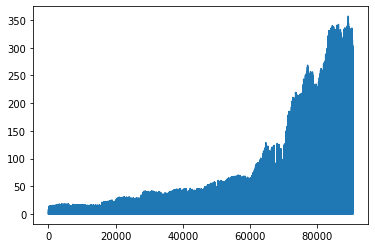

In [0]:
# Plotting the solar generation
plt.plot(joined_df['Solar'])

Because the above graph shows a trend of solar generation increasing, we realized that there could be increase in capacity over the years due to clean energy efforts. We needed to find a capacity data to normalize these values to the potential capacity.

In [0]:
# Creating a dataframe to interpolate our solar generation data
installed_capacity = pd.DataFrame()
for years in range(2013,2019):
  for months in range(1,13):
    row = [{"Year": years, "Month": months}]
    installed_capacity = installed_capacity.append(row, ignore_index=True)

In [0]:
installed_capacity

,Year,Month
0,2013,1
1,2013,2
2,2013,3
3,2013,4
4,2013,5
...,...,...
67,2018,8
68,2018,9
69,2018,10
70,2018,11


In [0]:
# "installed" is the installed capacity value 
installed = [121,193,288,566,1069,1858]
installed_capacity_no_inter = pd.DataFrame({"Year":range(2013,2019), "Installed": installed})
installed_capacity_no_inter

,Year,Installed
0,2013,121
1,2014,193
2,2015,288
3,2016,566
4,2017,1069
5,2018,1858


In [0]:
# In order to interpolate the data, we needed the previous year (2012) data
installed = [82,121,193,288,566,1069,1858]

# We used numpy linear method to interpolate
installed_row_lin = []
size = len(installed) - 1
for i in range(size):
  low = installed[i]
  high = installed[i+1]
  installed_row_lin.append(np.linspace(low, high, 12))
installed_row_lin = np.concatenate(installed_row_lin)

In [0]:
# We also used numpy geometric method to interpolate
installed_row_geom = []
size = len(installed) - 1
for i in range(size):
  low = installed[i]
  high = installed[i+1]
  installed_row_geom.append(np.geomspace(low, high, 12))
installed_row_geom = np.concatenate(installed_row_geom)

In [0]:
# Comibining the linear and geometric interpolation values
installed_capacity["installed_lin"] = installed_row_lin
installed_capacity["installed_geom"] = installed_row_geom
installed_capacity

,Year,Month,installed_lin,installed_geom
0,2013,1,82.000000,82.000000
1,2013,2,85.545455,84.952253
2,2013,3,89.090909,88.010796
3,2013,4,92.636364,91.179455
4,2013,5,96.181818,94.462197
...,...,...,...,...
67,2018,8,1571.090909,1519.666373
68,2018,9,1642.818182,1597.984703
69,2018,10,1714.545455,1680.339287
70,2018,11,1786.272727,1766.938142


In [0]:
# Merging the installed capacity to the big df
capacity_joined_df = joined_df.merge(installed_capacity, on=['Year','Month'])
capacity_joined_df = capacity_joined_df.merge(installed_capacity_no_inter, on='Year')

In [0]:
capacity_joined_df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Date,hhmm,Solar,installed_lin,installed_geom,Installed
0,2013,1,1,0,0,0,0,0,0,0,0,4,17.0,171.19,0,0.143,1.2,4.701,215.9,100.00,17.0,1010.0,01/01/2013,00:00,0.0,82.0,82.0,121
1,2013,1,1,0,30,0,0,0,0,0,0,4,17.0,173.12,0,0.143,1.0,4.717,215.9,100.00,17.0,1010.0,01/01/2013,00:30,0.0,82.0,82.0,121
2,2013,1,1,1,0,0,0,0,0,0,0,4,17.0,169.65,0,0.143,0.8,4.734,264.1,100.00,17.0,1010.0,01/01/2013,01:00,0.0,82.0,82.0,121
3,2013,1,1,1,30,0,0,0,0,0,0,4,17.0,163.97,0,0.143,1.2,4.707,264.1,100.00,17.0,1010.0,01/01/2013,01:30,0.0,82.0,82.0,121
4,2013,1,1,2,0,0,0,0,0,0,0,4,17.0,157.73,0,0.143,1.6,4.681,324.3,100.00,17.0,1010.0,01/01/2013,02:00,0.0,82.0,82.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90515,2018,12,31,21,30,0,0,0,0,0,0,8,0.1,140.49,0,0.140,3.7,1.100,181.0,78.08,3.6,1030.0,12/31/2018,21:30,0.0,1858.0,1858.0,1858
90516,2018,12,31,22,0,0,0,0,0,0,0,4,-0.4,147.00,0,0.140,3.8,1.100,360.0,77.05,3.2,1031.0,12/31/2018,22:00,0.0,1858.0,1858.0,1858
90517,2018,12,31,22,30,0,0,0,0,0,0,7,-0.4,153.47,0,0.140,3.9,1.100,180.0,78.70,2.9,1031.0,12/31/2018,22:30,0.0,1858.0,1858.0,1858
90518,2018,12,31,23,0,0,0,0,0,0,0,7,-1.1,159.86,0,0.140,4.0,1.100,0.0,76.42,2.6,1031.0,12/31/2018,23:00,0.0,1858.0,1858.0,1858


In [0]:
# Creating a new column with the normalized value of solar generation
capacity_joined_df['Normalized_Solar'] = capacity_joined_df['Solar']/capacity_joined_df['Installed']
capacity_joined_df['Normalized_Solar_lin'] = capacity_joined_df['Solar']/capacity_joined_df['installed_lin']
capacity_joined_df['Normalized_Solar_geom'] = capacity_joined_df['Solar']/capacity_joined_df['installed_geom']

In [0]:
capacity_joined_df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Date,hhmm,Solar,installed_lin,installed_geom,Installed,Normalized_Solar,Normalized_Solar_lin,Normalized_Solar_geom
0,2013,1,1,0,0,0,0,0,0,0,0,4,17.0,171.19,0,0.143,1.2,4.701,215.9,100.00,17.0,1010.0,01/01/2013,00:00,0.0,82.0,82.0,121,0.0,0.0,0.0
1,2013,1,1,0,30,0,0,0,0,0,0,4,17.0,173.12,0,0.143,1.0,4.717,215.9,100.00,17.0,1010.0,01/01/2013,00:30,0.0,82.0,82.0,121,0.0,0.0,0.0
2,2013,1,1,1,0,0,0,0,0,0,0,4,17.0,169.65,0,0.143,0.8,4.734,264.1,100.00,17.0,1010.0,01/01/2013,01:00,0.0,82.0,82.0,121,0.0,0.0,0.0
3,2013,1,1,1,30,0,0,0,0,0,0,4,17.0,163.97,0,0.143,1.2,4.707,264.1,100.00,17.0,1010.0,01/01/2013,01:30,0.0,82.0,82.0,121,0.0,0.0,0.0
4,2013,1,1,2,0,0,0,0,0,0,0,4,17.0,157.73,0,0.143,1.6,4.681,324.3,100.00,17.0,1010.0,01/01/2013,02:00,0.0,82.0,82.0,121,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90515,2018,12,31,21,30,0,0,0,0,0,0,8,0.1,140.49,0,0.140,3.7,1.100,181.0,78.08,3.6,1030.0,12/31/2018,21:30,0.0,1858.0,1858.0,1858,0.0,0.0,0.0
90516,2018,12,31,22,0,0,0,0,0,0,0,4,-0.4,147.00,0,0.140,3.8,1.100,360.0,77.05,3.2,1031.0,12/31/2018,22:00,0.0,1858.0,1858.0,1858,0.0,0.0,0.0
90517,2018,12,31,22,30,0,0,0,0,0,0,7,-0.4,153.47,0,0.140,3.9,1.100,180.0,78.70,2.9,1031.0,12/31/2018,22:30,0.0,1858.0,1858.0,1858,0.0,0.0,0.0
90518,2018,12,31,23,0,0,0,0,0,0,0,7,-1.1,159.86,0,0.140,4.0,1.100,0.0,76.42,2.6,1031.0,12/31/2018,23:00,0.0,1858.0,1858.0,1858,0.0,0.0,0.0


Text(0.5, 1.0, 'geometric')

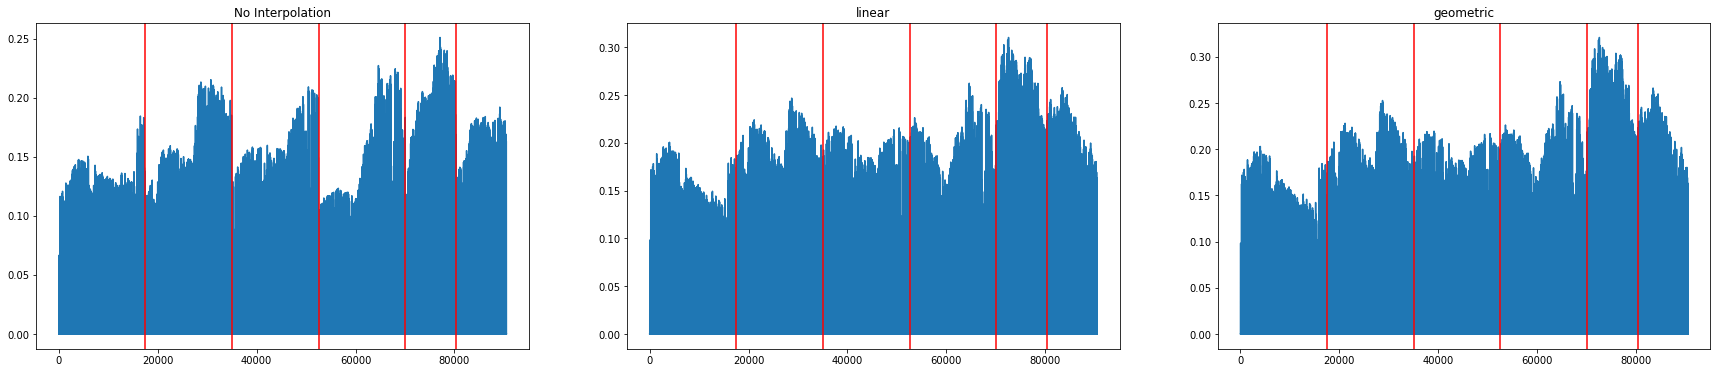

In [0]:
# Plotting the solar generation data
# Here we show comparison among static, linear, and geometric interpolations
fig, ax = plt.subplots(1, 3, figsize=(30,6))
x = range(capacity_joined_df.shape[0])
ax[0].plot(x,capacity_joined_df['Normalized_Solar'])
ax[1].plot(x,capacity_joined_df['Normalized_Solar_lin'])
ax[2].plot(x,capacity_joined_df['Normalized_Solar_geom'])

# The dataframe index where the year changes.
# Might be better to comb through the data through regex.
year_index = [17519, 35039, 52559, 70079, 80299]
for ax_i in range(3):
  for i in range(5):
    ax[ax_i].axvline(year_index[i], 0, 1, c="r") 
ax[0].set_title("No Interpolation")
ax[1].set_title("linear")
ax[2].set_title("geometric")

This is better. It shows a normalized solar generation depending on the capacity change throughout the years. Here we have comparison among "No Interpolation", "Linear Interpolation", and "Geometric Interpolation" for our installed capacity data. Linear interpolation was accomplished with np.linspace whereas the geomtric interpolation was done with np.geomspace. The red lines indicate when the "Year" changes.  One can see that in the "No Interpolation", the drops are correlated with the change in years. However, this behavior is less apparent in the linear and geometric interpolation graphs.

In [0]:
capacity_joined_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Date', 'hhmm', 'Solar',
       'installed_lin', 'installed_geom', 'Installed', 'Normalized_Solar',
       'Normalized_Solar_lin', 'Normalized_Solar_geom'],
      dtype='object')

In [0]:
# Exporting the data to csv format
path='/content/drive/Shared drives/EnergyForecaster/Dataset/'
capacity_joined_df.to_csv(path+'out_with_interpolation.csv', na_rep='NA', columns=['Date','hhmm', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar',
       'Normalized_Solar_lin', 'Normalized_Solar_geom', 'Normalized_Solar'])

Data points where the solar generation is 0 is removed to prevent our machine learning models from receiving unnecessary info. 

The Random Forest algorithm showed much lower deviation after removing the 0s.

In [0]:
no0Solar_df = capacity_joined_df[capacity_joined_df.Normalized_Solar != 0]

In [0]:
no0Solar_df.dropna(inplace=True)
no0Solar_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Date,hhmm,Solar,installed_lin,installed_geom,Installed,Normalized_Solar,Normalized_Solar_lin,Normalized_Solar_geom
16,2013,1,1,8,0,13,0,13,50,204,77,4,10.0,82.67,0,0.143,2.9,3.814,355.2,96.35,11.0,1010.0,01/01/2013,08:00,0.000080,82.0,82.0,121,6.611570e-07,9.756098e-07,9.756098e-07
17,2013,1,1,8,30,65,0,65,81,356,160,8,10.0,77.27,0,0.143,3.0,3.741,355.2,96.38,11.0,1010.0,01/01/2013,08:30,0.184486,82.0,82.0,121,1.524678e-03,2.249829e-03,2.249829e-03
18,2013,1,1,9,0,10,0,10,99,487,248,7,10.0,72.18,0,0.143,3.3,3.669,1.7,96.05,11.0,1010.0,01/01/2013,09:00,0.472936,82.0,82.0,121,3.908562e-03,5.767512e-03,5.767512e-03
19,2013,1,1,9,30,14,0,14,114,566,331,8,10.0,67.46,4,0.143,3.3,3.601,1.7,96.08,11.0,1010.0,01/01/2013,09:30,0.919004,82.0,82.0,121,7.595074e-03,1.120737e-02,1.120737e-02
20,2013,1,1,10,0,31,0,31,119,643,409,4,10.0,63.22,0,0.143,3.4,3.534,5.4,89.10,12.0,1010.0,01/01/2013,10:00,1.363654,82.0,82.0,121,1.126987e-02,1.662993e-02,1.662993e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90504,2018,12,31,16,0,103,228,166,59,715,258,7,10.5,73.86,43,0.140,0.7,1.300,252.0,87.95,12.4,1012.0,12/31/2018,16:00,278.939981,1858.0,1858.0,1858,1.501292e-01,1.501292e-01,1.501292e-01
90505,2018,12,31,16,30,65,111,86,49,596,162,7,10.5,79.03,100,0.140,0.7,1.300,237.0,90.88,11.9,1012.0,12/31/2018,16:30,245.728932,1858.0,1858.0,1858,1.322545e-01,1.322545e-01,1.322545e-01
90506,2018,12,31,17,0,30,52,35,33,398,71,4,9.2,84.45,100,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,12/31/2018,17:00,151.002948,1858.0,1858.0,1858,8.127177e-02,8.127177e-02,8.127177e-02
90507,2018,12,31,17,30,5,27,5,10,85,10,7,9.2,89.79,43,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,12/31/2018,17:30,50.007981,1858.0,1858.0,1858,2.691495e-02,2.691495e-02,2.691495e-02


In [0]:
# Exporting the data to csv format
path='/content/drive/Shared drives/EnergyForecaster/Dataset/'
no0Solar_df.to_csv(path+'no_0_solar_with_interpolation.csv', na_rep='NA', 
                   columns=['Date','hhmm', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar',
       'Normalized_Solar_lin', 'Normalized_Solar_geom', 'Normalized_Solar'])